<a href="https://colab.research.google.com/github/TAEO2474/python-dev/blob/main/408_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%82%AC%EC%A0%84%EC%B2%98%EB%A6%AC_%ED%94%BC%EC%B2%98_%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# < 데이터 사전처리 기본과정>
- 1) 원본 데이터 로드 →
- 2) 결측치/누락값 확인 →
- 3) 결측치 처리(삭제 또는 대체) →
- 4) 중복 데이터 확인 및 제거 →
- 5) 이상치 처리 →
- 6) 스케일링 & 인코딩 등 추가 작업 ✅ →
- 7)  데이터셋을 훈련용(train)과 테스트용(test)으로 나누는 작업✅
- 7) 모델 학습✅


# <인코딩 vs 스케일링 차이점 정리>
| 구분          | 인코딩 (Encoding)                                    | 스케일링 (Scaling)                         |
| ----------- | ------------------------------------------------- | -------------------------------------- |
| **목적**      | 비수치(범주형) 데이터를 숫자 데이터로 변환                          | 수치 데이터의 값 범위를 일정한 범위(주로 0\~1)로 조정      |
| **대상 데이터**  | 명목형(카테고리), 순서형 데이터                                | 연속형(수치형) 데이터                           |
| **변환 방식**   | 값 자체를 ‘범주를 대표하는 숫자’로 변환                           | 값의 크기(분포)를 조정하여 스케일 맞춤                 |
| **예시**      | 'red' → \[1, 0, 0] (one-hot) 또는 'red' → 0 (label) | 100 → 0.8 (최대값 125 기준)                 |
| **결과 의미**   | 숫자가 ‘카테고리’를 표현                                    | 숫자가 원래 값의 상대적 크기를 유지한 채 범위 내 위치함       |
| **주 사용 이유** | 모델이 범주형 데이터를 이해할 수 있게 하기 위해                       | 학습 안정성 향상, 빠른 수렴, 거리 기반 알고리즘에서 성능 개선 등 |



- 인코딩: “사과, 바나나, 딸기” 같은 단어를 컴퓨터가 이해할 수 있는 숫자로 바꿔주는 것

- 스케일링: “키, 몸무게”처럼 숫자 크기가 너무 다를 때, 0~1 사이로 쏙쏙 맞춰주는 것


보충 설명
- 인코딩 후에도 스케일링이 필요한 경우가 많아요! (예: 라벨 인코딩된 숫자형 범주 데이터를 스케일링하면 안 되는 경우도 있고, 수치형 데이터는 반드시 스케일링할 때도 있고)

- 둘 다 머신러닝 전처리 과정에서 매우 중요하지만 대상 데이터와 목적이 다르니 혼동하지 않는 게 좋아요!

# ✅ 1. 연속형 데이터 (Continuous / 수치형)

숫자처럼 **연속적인 크기와 단위를 가지는 데이터**  
→ 값을 정렬할 수 있고, **평균·합계 등 수학적 계산이 가능**

###  특징
- 수학 연산 가능 (`+`, `-`, `/`, `*`)
- 숫자 간 **크기 비교가 의미 있음**
- 축적되거나 변화하는 양을 나타냄

###  예시

| 변수       | 설명                 |
|------------|----------------------|
| 키(cm)     | 예: 170.5, 181.2     |
| 몸무게(kg) | 예: 65.2, 72.0       |
| 나이       | 예: 23, 31, 45       |
| 소득       | 예: 3,200,000원 등   |
| 온도       | 예: 22.1°C, 24.6°C   |

---

# ✅ 2. 범주형 데이터 (명목형/순서형)

**크기보다 ‘종류’가 중요한 데이터**  
→ 숫자가 들어있어도 **계산보다는 구분/분류**가 목적

###  특징
- 연산 불가능 (예: 남자 + 여자 = ❌)
- 숫자가 있어도 그건 **코드일 뿐**
- 그룹, 레이블, 카테고리 구분에 사용

###  분류
- **명목형(Nominal)**: 순서 없음  
  → 예: 성별(M/F), 색상(빨강/파랑), 도시(서울/부산)
  
- **순서형(Ordinal)**: 순서 있음  
  → 예: 학점(A/B/C), 만족도(매우만족/만족/보통/불만족)

###  예시

| 변수           | 설명                             |
|----------------|----------------------------------|
| 성별           | M, F                             |
| 혈액형         | A, B, AB, O                      |
| 지역           | 서울, 부산, 대전                 |
| 고객 등급      | 일반, VIP, VVIP (순서형 가능)    |
| 상품 카테고리  | 전자, 식품, 의류                 |

---

# 예제 비교

| 데이터 열     | 값 예시           | 데이터 유형          |
|---------------|-------------------|-----------------------|
| age           | 25, 32, 41        | 연속형               |
| height        | 170.2, 180.5      | 연속형               |
| gender        | M, F              | 범주형 (명목형)       |
| satisfaction  | 높음, 보통, 낮음 | 범주형 (순서형)       |

# 【Data Scaling(데이터 스케일링)】
- 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링(feature scaling)이라고 한다.
- 피처(feature)=컬럼(column) 들마다 데이터의 값이 범위가 다 제각각이거나 단위가 다른 경우 데이터를 학습을 할때 0으로 수렴하거나 무한으로 발산할 수 있다.
  - 분석시에 변수들이 너무 스케일이 다를 경우  => 변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우
  - 신경망 학습시에 => 데이터셋의 값이 들쑥날쑥하거나, 매우 큰 경우에는 cost의 값이 발산하여 정상적인 학습이 이루어지지 않습니다.

- 이런 경우 데이터 스켈링을 통해 모든 피처들의 데이터 분포나 범위를 동일하게 조정해 줄 수 있다.
- Scaling 메서드는 scikit-learn의 preprocessing에서 제공한다.

#  sklearn의 Scaling 종류
   - ① StandardScaler : 평균이 0 분산이 1인 정규분포로 변환
   - MinMaxScaler :  0 ~ 1 사이의 실수로 변환, 타이타닉 생존자 예측(0 또는 1)과 같은 분류 문제보다는, 아파트 실거래가격 예측과 같은 회귀 문제를 해결할 때 더 적합한 스케일링 기법
   - ② RobustScaler : 중앙값이 0, 중앙값을 0으로, IQR을 1로 변환, StandardScaler에 비해 이상치의 영향이 적어진다는 장점
   - ③ MaxAbsScaler : 모든 피처들의 절댓값이 0과 1 사이에 놓이도록 변환, 극단적인 이상치에는 민감할 수 있으므로 꼭 이상치를 제거
   - ④ Normalizer :  row를 기준으로 row(data point)마다 정규화를 진행, 한 행의 모든 features 사이에 유클리드 거리가 1이 되도록 데이터값을 변환, Normalizer를 사용하면 학습 속도도 빨라지고 과대적합 확률을 낮춤

In [ ]:
# '파이썬 라이브러리를 활용한 머신러닝'의 저자가 제공한 라이브러리
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 9.1 MB/s eta 0:00:00


In [ ]:
import mglearn

In [ ]:
print(dir(mglearn))

['ReBl', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'cm2', 'cm3', 'datasets', 'discrete_scatter', 'plot_2d_separator', 'plot_agglomerative', 'plot_animal_tree', 'plot_cross_validation', 'plot_dbscan', 'plot_decomposition', 'plot_grid_search', 'plot_helpers', 'plot_improper_preprocessing', 'plot_interactive_tree', 'plot_kmeans', 'plot_kneighbors_regularization', 'plot_knn_classification', 'plot_knn_regression', 'plot_linear_regression', 'plot_linear_svc_regularization', 'plot_metrics', 'plot_nmf', 'plot_nn_graphs', 'plot_pca', 'plot_rbf_svm_parameters', 'plot_ridge', 'plot_scaling', 'plot_tree_nonmonotonous', 'plots', 'tools']


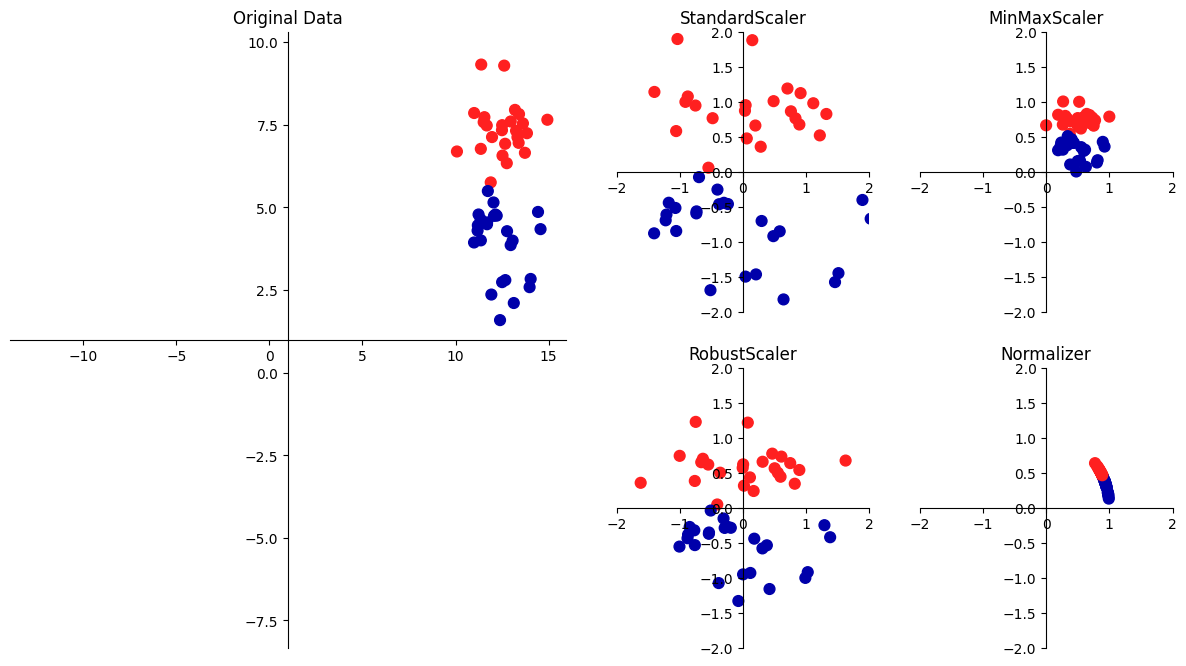

In [ ]:
mglearn.plot_scaling.plot_scaling()

1. ## **① MaxAbsScaler**

- 데이터의 **절대값이 1을 넘지 않도록** 스케일링
- 음수와 양수 값이 섞인 sparse 데이터에 적합

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform([[-1, 23], [0, 3], [1, -2]])
X_scaled

array([[-1.        ,  1.        ],
       [ 0.        ,  0.13043478],
       [ 1.        , -0.08695652]])

2. ## **② MinMaxScaler**

- **최소-최대 정규화**: 데이터를 `[0, 1]` 범위로 변환

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform([[1, 2], [3, 4], [5, 6]])
X_scaled

array([[0. , 0. ],
       [0.5, 0.5],
       [1. , 1. ]])

# ③ StandardScaler

- **Z-score 정규화**:
   - 평균을 0,
   - 표준편차를 1로 변환

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform([[1, 2], [3, 4], [5, 6]])
X_scaled


array([[-1.22474487, -1.22474487],
       [ 0.        ,  0.        ],
       [ 1.22474487,  1.22474487]])

# ④ Normalizer
- 각 행의 벡터 크기를 1로 정규화 (L1, L2, Max 노름 사용 가능)

In [ ]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l2')
X_normalized = normalizer.transform([[1, 2], [3, 4]])
X_normalized

array([[0.4472136 , 0.89442719],
       [0.6       , 0.8       ]])

# ⑤ RobustScaler
- RobustScaler는 **중간값(median)**과 **사분위수(IQR)**를 기준으로 스케일링하는 기법으로,
이상치(outlier)에 덜 민감한 정규화 방법

In [38]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# 예제 데이터
data = {
    'Income': [3000, 3200, 3400, 100000, 3600],  # 이상치 존재
    'Age': [25, 26, 27, 28, 29]
}
df = pd.DataFrame(data)
print(" 원본 데이터:\n", df)

# RobustScaler 객체 생성 및 적용
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df)

# 결과를 DataFrame으로 변환
df_scaled = pd.DataFrame(scaled_data, columns=['Income_scaled', 'Age_scaled'])
print("RobustScaler 결과:\n", df_scaled)

# 3          241.5         0.5  이상이 영향 작음

 원본 데이터:
    Income  Age
0    3000   25
1    3200   26
2    3400   27
3  100000   28
4    3600   29
RobustScaler 결과:
    Income_scaled  Age_scaled
0           -1.0        -1.0
1           -0.5        -0.5
2            0.0         0.0
3          241.5         0.5
4            0.5         1.0


| Feature 이름          | 설명      | 단위 |
| ------------------- | ------- | -- |
| `sepal length (cm)` | 꽃받침의 길이 | cm |
| `sepal width (cm)`  | 꽃받침의 너비 | cm |
| `petal length (cm)` | 꽃잎의 길이  | cm |
| `petal width (cm)`  | 꽃잎의 너비  | cm |

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

# load_iris
- 붓꽃 품종 분류 데이터

- target: 0(setosa), 1(versicolor), 2(virginica)
- 주요 feature:
sepal_length, sepal_width
petal_length, petal_width
- data: (150, 4)


In [15]:
# 아이리스 꽃 데이터셋
iris = load_iris()
print(dir(iris))
print(iris.target)

iris = pd.DataFrame(iris.data, columns=iris.feature_names)
print(iris.head())
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})
iris.head()

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# 데이터셋을 훈련용(train)과 테스트용(test)으로 나누는 과정 (인코딩과 스켈링 직후에 진행)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris.drop(columns='Class'),  # 입력(features)
    iris['Class'],               # 정답(target)
    test_size=0.2                # 20%는 테스트셋, 80%는 훈련셋
)


# 전제 조건
- 먼저 iris 데이터셋은 기본적으로 150개의 샘플과 4개의 특성(features), 그리고 1개의 클래스(label)로 구성되어 있습니다.

- iris.shape 👉 (150, 5)
- (4개의 feature + 1개의 Class 컬럼)

# test_size=0.2
- 전체 샘플 수: 150

- 20% 테스트셋 → 150 × 0.2 = 30개

- 80% 훈련셋 → 150 × 0.8 = 120개
```
iris.drop(columns='Class')  → shape: (150, 4)
iris['Class']               → shape: (150,)
```

In [50]:
# - 훈련용 데이터의 크기 확인
print(X_train.shape, y_train.shape)
# X_train.shape: 훈련용 입력 데이터(X_train)의 행과 열 개수(모양)를 출력. → 행은 훈련 샘플 수, 열은 특성(feature) 수
# y_train.shape: 훈련용 타깃 데이터(y_train)의 길이(몇 개의 정답 데이터가 있는지)를 출력. → 보통 X_train의 행 개수와 동일

# - 테스트용 데이터의 크기 확인
print(X_test.shape, y_test.shape)

# X_test.shape: 테스트용 입력 데이터(X_test)의 행과 열 개수를 출력합니다. → 테스트 샘플 수와 특성 수를 보여줍니다.
# y_test.shape: 테스트용 타깃 데이터(y_test)의 길이를 출력. → 테스트 샘플 수와 동일

(120, 4) (120,)
(30, 4) (30,)



# 한마디 정리
shape은 데이터의 차원과 크기를 알려주는 속성

출력 결과로 (샘플 수, 특성 수) 또는 (샘플 수,) 같은 튜플 형태가 나옵니다

훈련/테스트용 데이터 각각이 잘 나누어졌는지 확인할 때 유용해요!

| 변수         | 설명                            |
| ---------- | ----------------------------- |
| `(120, 4)` | 120개의 훈련 데이터 샘플, 각 샘플에 4개의 특성 |
| `(120,)`   | 120개의 훈련 데이터에 대한 정답 (클래스)     |
| `(30, 4)`  | 30개의 테스트 데이터 샘플, 각 샘플에 4개의 특성 |
| `(30,)`    | 30개의 테스트 데이터에 대한 정답 (클래스)     |


In [51]:
# y_train: 훈련용 타깃 데이터 (즉, 각 샘플이 어떤 붓꽃인지 나타냄)
# .value_counts()는 **각 클래스(label)**가 몇 번 나왔는지 카운트(세기) 해주는 함수
print(y_train.value_counts())

Class
Versicolour    43
Setosa         40
Virginica      37
Name: count, dtype: int64


In [21]:
# 테스트 데이터(y_test)**에 대해 클래스별 개수를 세는 코드
print(y_test.value_counts())

Class
Virginica      13
Setosa         10
Versicolour     7
Name: count, dtype: int64


In [22]:
import seaborn as sns

In [24]:
print(type(y_train))
print(y_train.head())

<class 'pandas.core.series.Series'>
28        Setosa
0         Setosa
21        Setosa
2         Setosa
140    Virginica
Name: Class, dtype: object


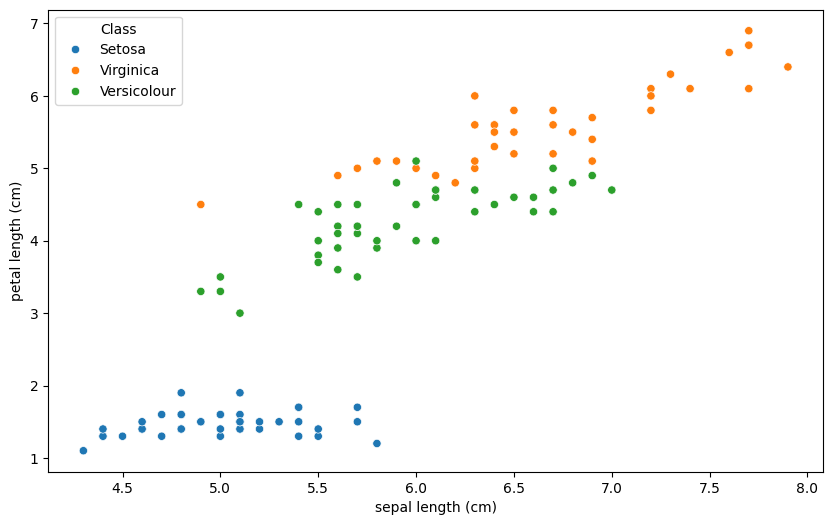

In [57]:
fig =sns.scatterplot(data=X_train, x=X_train.iloc[:,0], y=X_train.iloc[:,2], hue=y_train)
fig.figure.set_size_inches(10,6)

In [27]:
StdScaler = StandardScaler()

# Train데이터의 fitting과 스케일링
StdScaler.fit(X_train)  #fit()은 학습을 시키는 메소드이다.
X_train_sc = StdScaler.transform(X_train)  #transform() 실제로 학습시킨 것을 적용하는 메소드이다.

print('\t\t(min, max)  (mean,std)')
print('Train_scaled (%.2f, %.2f) ( %.2f, %.2f)'%(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(),X_train_sc.std()))

		(min, max)  (mean,std)
Train_scaled (-2.41, 3.08) ( -0.00, 1.00)


In [39]:
StdScaler2 = StandardScaler()
StdScaler2.fit_transform(X_train)


array([[-0.75923386,  0.78946128, -1.33496568, -1.31422302],
       [-0.87588951,  1.01829064, -1.33496568, -1.31422302],
       [-0.87588951,  1.47594935, -1.27803751, -1.04805127],
       [-1.34251212,  0.33180257, -1.39189386, -1.31422302],
       [ 0.9906009 ,  0.10297321,  1.05601763,  1.61366624],
       [-0.29261126, -0.58351486,  0.65752041,  1.08132274],
       [ 1.57387916,  1.24712   ,  1.3406585 ,  1.74675212],
       [-0.87588951,  1.01829064, -1.33496568, -1.18113715],
       [-0.05929996, -0.81234422,  0.08823867,  0.01663573],
       [ 1.34056785,  0.33180257,  0.54366406,  0.28280749],
       [ 0.5239783 , -1.27000293,  0.71444859,  0.94823687],
       [ 0.05735569,  0.33180257,  0.60059224,  0.81515099],
       [ 0.5239783 , -0.58351486,  0.77137676,  0.41589336],
       [-0.87588951,  1.70477871, -1.05032481, -1.04805127],
       [-0.29261126, -1.27000293,  0.08823867, -0.11645014],
       [ 2.15715741,  1.70477871,  1.68222755,  1.34749449],
       [-1.45916777,  0.

In [29]:
xt = pd.DataFrame(X_train_sc.T)
xt

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,-0.759234,-0.875890,-0.875890,-1.342512,0.990601,-0.292611,1.573879,-0.875890,-0.059300,1.340568,...,1.223912,0.523978,1.807190,-1.459168,-0.992545,-0.992545,0.057356,0.290667,1.573879,-0.175956
1,0.789461,1.018291,1.475949,0.331803,0.102973,-0.583515,1.247120,1.018291,-0.812344,0.331803,...,0.102973,0.560632,-0.583515,0.102973,0.560632,1.018291,-0.125856,-0.125856,0.331803,1.704779
2,-1.334966,-1.334966,-1.278038,-1.391894,1.056018,0.657520,1.340659,-1.334966,0.088239,0.543664,...,0.771377,1.283730,1.340659,-1.278038,-1.334966,-1.221109,0.259023,0.657520,1.283730,-1.164181
3,-1.314223,-1.314223,-1.048051,-1.314223,1.613666,1.081323,1.746752,-1.181137,0.016636,0.282807,...,1.480580,1.746752,0.948237,-1.314223,-1.314223,-0.781880,0.415893,0.815151,0.815151,-1.181137


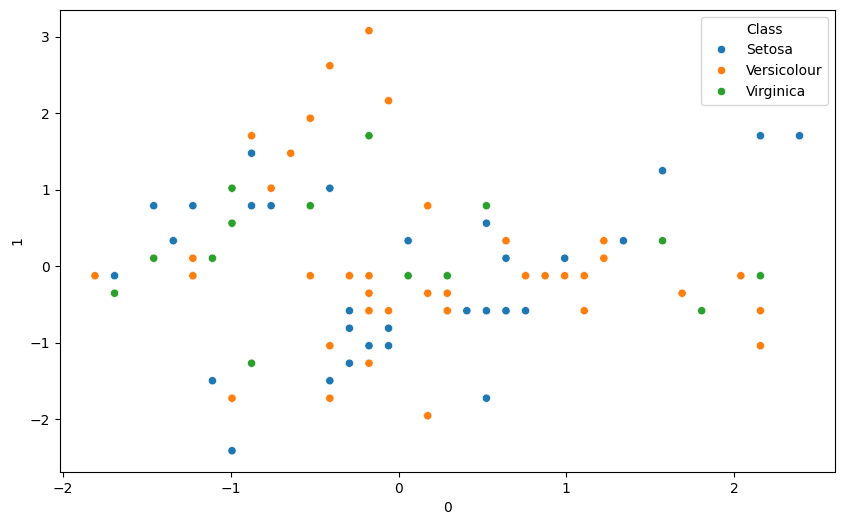

In [30]:
fig =sns.scatterplot(data=xt, x=xt.iloc[0,:], y=xt.iloc[1,], hue=y_train)
fig.figure.set_size_inches(10,6)

In [31]:
from sklearn.preprocessing import MinMaxScaler

MmScaler = MinMaxScaler()

# Train 데이터의 fitting과 스케일링
# fit()은 학습을 시키는 메소드이다.
MmScaler.fit(X_train)

#transform()은 실제로 학습시킨 것을 적용하는 메소드이다.
X_train_sc = MmScaler.transform(X_train)
print(X_train_sc.shape)

print('\t\t(min, max)  (mean,std)')
print('Train_scaled (%.2f, %.2f) ( %.2f, %.2f)'%(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(),X_train_sc.std()))

(120, 4)
		(min, max)  (mean,std)
Train_scaled (0.00, 1.00) ( 0.44, 0.26)


(480,)


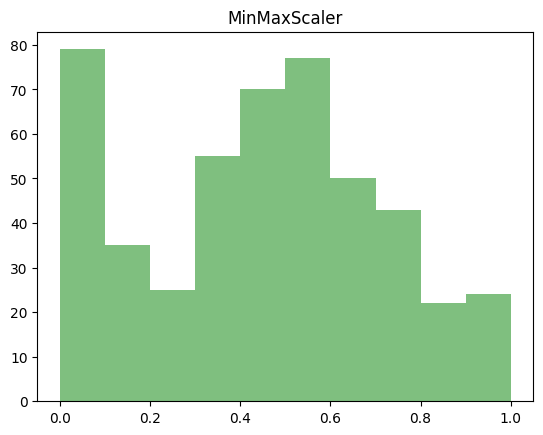

In [32]:
X_train_sc_flat = X_train_sc.flatten()
print(X_train_sc_flat.shape)
#print(X_train_sc_flat)
plt.hist(X_train_sc_flat, color='green', alpha=0.5)
plt.title('MinMaxScaler')
plt.show()

In [33]:
xt = pd.DataFrame(X_train_sc).T

In [34]:
xt.iloc[0, :].shape

(120,)

In [35]:
xt.shape

(4, 120)

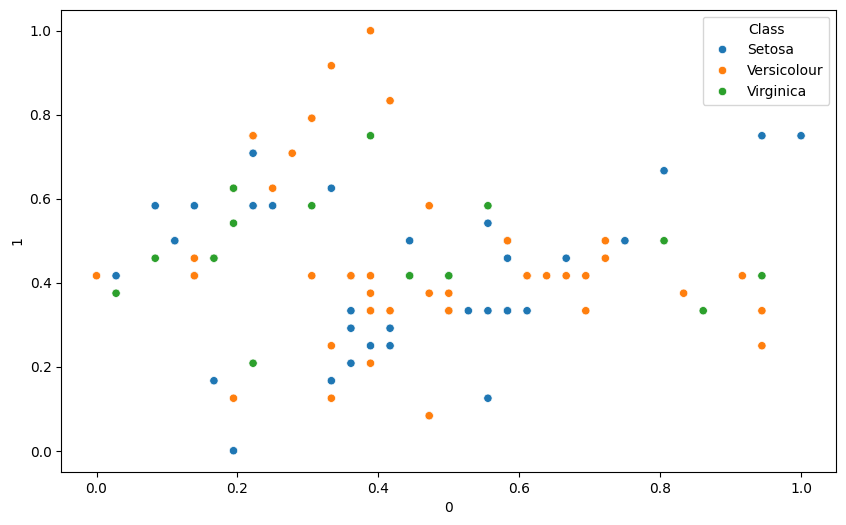

In [36]:
fig = sns.scatterplot(data=xt , x=xt.iloc[0,:], y=xt.iloc[1,:], hue=y_train)
fig.figure.set_size_inches(10,6)

In [37]:
from sklearn.preprocessing import MaxAbsScaler

MaScaler = MaxAbsScaler()

# Train 데이터의 fitting과 스케일링
MaScaler.fit(X_train)
X_train_sc = MaScaler.transform(X_train)


print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.04, 1.00) (0.61, 0.24)


In [40]:
X_train_sc.shape

(120, 4)

In [41]:
xt = pd.DataFrame(X_train_sc.T)
xt

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0.658228,0.645570,0.645570,0.594937,0.848101,0.708861,0.911392,0.645570,0.734177,0.886076,...,0.873418,0.797468,0.936709,0.582278,0.632911,0.632911,0.746835,0.772152,0.911392,0.721519
1,0.772727,0.795455,0.840909,0.727273,0.704545,0.636364,0.818182,0.795455,0.613636,0.727273,...,0.704545,0.750000,0.636364,0.704545,0.750000,0.795455,0.681818,0.681818,0.727273,0.863636
2,0.202899,0.202899,0.217391,0.188406,0.811594,0.710145,0.884058,0.202899,0.565217,0.681159,...,0.739130,0.869565,0.884058,0.217391,0.202899,0.231884,0.608696,0.710145,0.869565,0.246377
3,0.080000,0.080000,0.160000,0.080000,0.960000,0.800000,1.000000,0.120000,0.480000,0.560000,...,0.920000,1.000000,0.760000,0.080000,0.080000,0.240000,0.600000,0.720000,0.720000,0.120000


In [42]:
xt.shape

(4, 120)

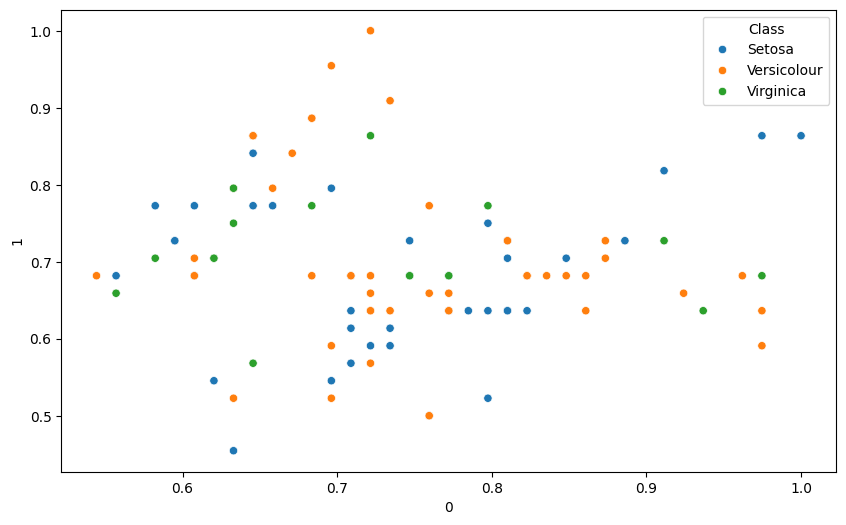

In [43]:
fig = sns.scatterplot(data=xt , x=xt.iloc[0,:], y=xt.iloc[1,:], hue=y_train)
fig.figure.set_size_inches(10,6)

In [44]:
from sklearn.preprocessing import RobustScaler

RuScaler = RobustScaler()

# Train 데이터의 fitting과 스케일링
RuScaler.fit(X_train)
X_train_sc = RuScaler.transform(X_train)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.00, 2.80) (-0.00, 0.66)


In [45]:
xt = pd.DataFrame(X_train_sc.T)
xt

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,-0.377358,-0.452830,-0.45283,-0.754717,0.754717,-0.075472,1.132075,-0.452830,0.075472,0.981132,...,0.905660,0.452830,1.283019,-0.830189,-0.528302,-0.528302,0.150943,0.301887,1.132075,0.000000
1,0.800000,1.000000,1.40000,0.400000,0.200000,-0.400000,1.200000,1.000000,-0.600000,0.400000,...,0.200000,0.600000,-0.400000,0.200000,0.600000,1.000000,0.000000,0.000000,0.400000,1.600000
2,-0.828571,-0.828571,-0.80000,-0.857143,0.371429,0.171429,0.514286,-0.828571,-0.114286,0.114286,...,0.228571,0.485714,0.514286,-0.800000,-0.828571,-0.771429,-0.028571,0.171429,0.485714,-0.742857
3,-0.733333,-0.733333,-0.60000,-0.733333,0.733333,0.466667,0.800000,-0.666667,-0.066667,0.066667,...,0.666667,0.800000,0.400000,-0.733333,-0.733333,-0.466667,0.133333,0.333333,0.333333,-0.666667


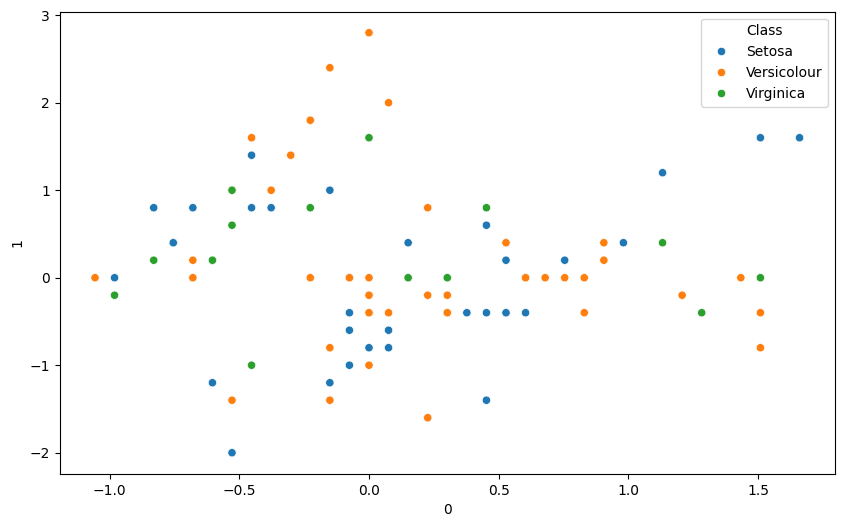

In [46]:
fig = sns.scatterplot(data=xt , x=xt.iloc[0,:], y=xt.iloc[1,:], hue=y_train)
fig.figure.set_size_inches(10,6)

In [47]:
from sklearn.preprocessing import Normalizer

NoScaler = Normalizer()


# Train 데이터의 fitting과 스케일링
NoScaler.fit(X_train)
X_train_sc = NoScaler.transform(X_train)


print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))


		(min, max) (mean, std)
Train_scaled (0.02, 0.86) (0.44, 0.24)


In [48]:
xt = pd.DataFrame(X_train_sc.T)

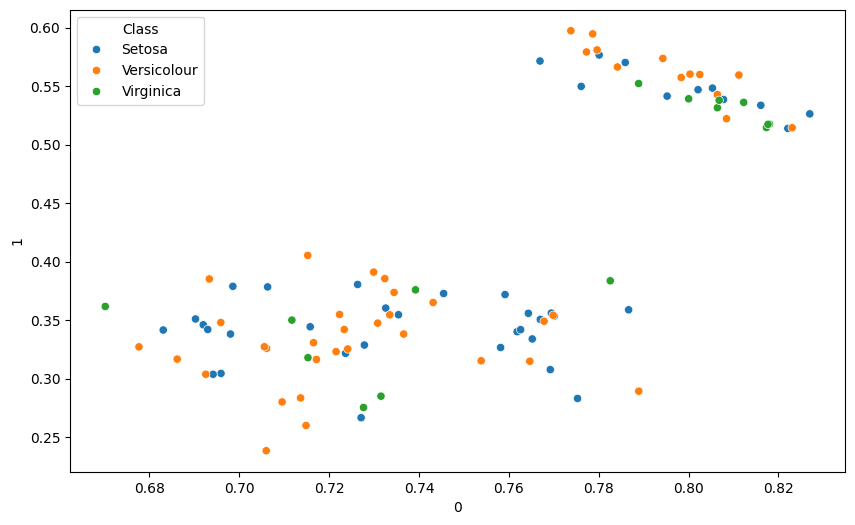

In [49]:
fig = sns.scatterplot(data=xt , x=xt.iloc[0,:], y=xt.iloc[1,:], hue=y_train)
fig.figure.set_size_inches(10,6)